In [660]:
import warnings
warnings.filterwarnings('ignore')

In [661]:
import pandas as pd
import numpy as np
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Read Datafiles</h2>

In [662]:
df = pd.read_csv("training_set_features.csv")
df_2 = pd.read_csv("training_set_labels.csv")

In [663]:
df = df.merge(df_2, on='respondent_id')
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [664]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

<AxesSubplot:>

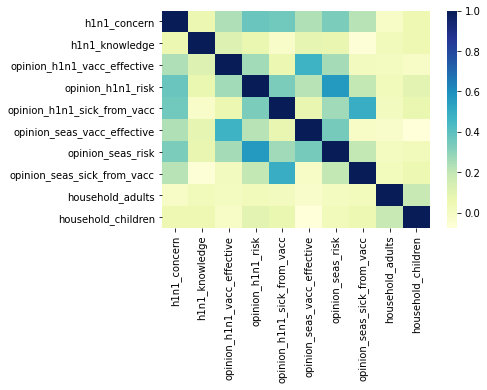

In [665]:
corr = df[["h1n1_concern",'h1n1_knowledge','opinion_h1n1_vacc_effective',
           'opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk',
          'opinion_seas_sick_from_vacc','household_adults',"household_children"]].corr()
sns.heatmap(corr, cmap="YlGnBu")

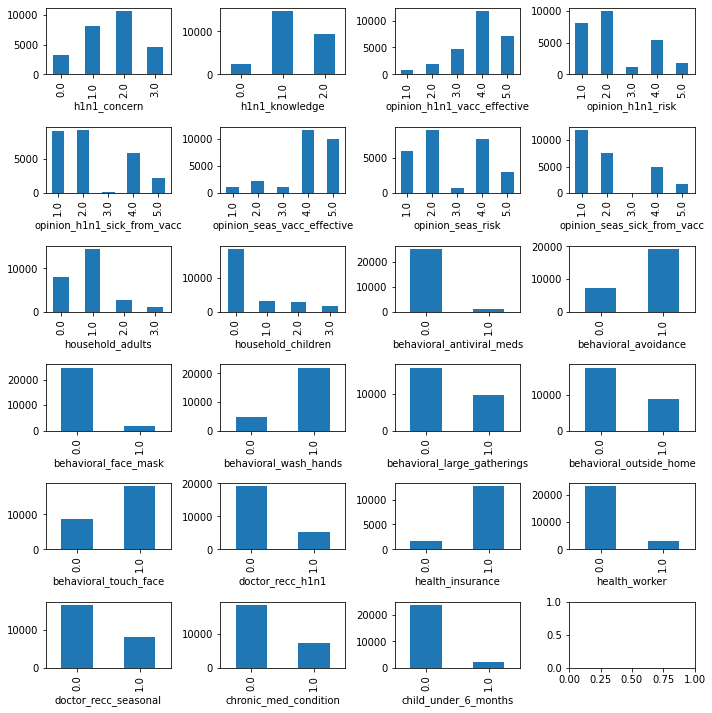

In [666]:
import pandas as pd
cat_columns=["h1n1_concern",'h1n1_knowledge','opinion_h1n1_vacc_effective',
           'opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk',
          'opinion_seas_sick_from_vacc','household_adults',
             "household_children",'behavioral_antiviral_meds',
             'behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands',
            'behavioral_large_gatherings','behavioral_outside_home',"behavioral_touch_face",
             "doctor_recc_h1n1",'health_insurance','health_worker'
            ,'doctor_recc_seasonal','chronic_med_condition','child_under_6_months']
%matplotlib inline
COL_NUM = 4
ROW_NUM = 6
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(10,10))
for i in range(len(cat_columns)):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    a=cat_columns[i]
    catogory=df.groupby(a)
    catogory.size().plot(kind='bar',figsize=(10,10),ax=ax)
plt.tight_layout() 

<h2>Data Preprocessing</h2>

In [667]:
df_h1n1 = df.copy()
df_h1n1['h1n1_concern'].fillna((df_h1n1['h1n1_concern'].median()), inplace=True)
df_h1n1['h1n1_knowledge'].fillna((df_h1n1['h1n1_knowledge'].median()), inplace=True)
df_h1n1['opinion_h1n1_vacc_effective'].fillna((df_h1n1['opinion_h1n1_vacc_effective'].median()), inplace=True)
df_h1n1['opinion_h1n1_risk'].fillna((df_h1n1['opinion_h1n1_risk'].median()), inplace=True)
df_h1n1['opinion_h1n1_sick_from_vacc'].fillna((df_h1n1['opinion_h1n1_sick_from_vacc'].median()), inplace=True)
df_h1n1['opinion_seas_vacc_effective'].fillna((df_h1n1['opinion_seas_vacc_effective'].median()), inplace=True)
df_h1n1['opinion_seas_risk'].fillna((df_h1n1['opinion_seas_risk'].median()), inplace=True)
df_h1n1['opinion_seas_sick_from_vacc'].fillna((df_h1n1['opinion_seas_sick_from_vacc'].median()), inplace=True)
df_h1n1.drop(columns=['respondent_id','health_insurance','hhs_geo_region','employment_industry',
                'employment_occupation'], axis=1, inplace=True)
df_h1n1.dropna(how='any',inplace=True)
df_h1n1

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,Female,"> $75,000",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0,1
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Female,"> $75,000",Not Married,Rent,Not in Labor Force,"MSA, Principle City",3.0,0.0,0,0
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0,0


In [668]:
df_seas = df.copy()
df_seas['h1n1_concern'].fillna((df_seas['h1n1_concern'].median()), inplace=True)
df_seas['h1n1_knowledge'].fillna((df_seas['h1n1_knowledge'].median()), inplace=True)
df_seas['opinion_h1n1_vacc_effective'].fillna((df_seas['opinion_h1n1_vacc_effective'].median()), inplace=True)
df_seas['opinion_h1n1_risk'].fillna((df_seas['opinion_h1n1_risk'].median()), inplace=True)
df_seas['opinion_h1n1_sick_from_vacc'].fillna((df_seas['opinion_h1n1_sick_from_vacc'].median()), inplace=True)
df_seas['opinion_seas_vacc_effective'].fillna((df_seas['opinion_seas_vacc_effective'].median()), inplace=True)
df_seas['opinion_seas_risk'].fillna((df_seas['opinion_seas_risk'].median()), inplace=True)
df_seas['opinion_seas_sick_from_vacc'].fillna((df_seas['opinion_seas_sick_from_vacc'].median()), inplace=True)
df_seas.drop(columns=['respondent_id','health_insurance','hhs_geo_region','employment_industry',
                'employment_occupation'], axis=1, inplace=True)
df_seas.dropna(how='any',inplace=True)
df_seas

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,Female,"> $75,000",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0,1
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Female,"> $75,000",Not Married,Rent,Not in Labor Force,"MSA, Principle City",3.0,0.0,0,0
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0,0


<h2>One-Hot Encoding for Categorical Variables</h2>

In [669]:
from sklearn.model_selection import train_test_split
X = df_h1n1.drop('h1n1_vaccine', axis=1)
y = df_h1n1['h1n1_vaccine']
encoder = ce.OneHotEncoder(cols=['age_group','education','race','income_poverty','sex','marital_status',
                                'rent_or_own','employment_status','census_msa'])
encoder.fit(X, y)
X = encoder.transform(X)
x_train_h1n1, x_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(X, y, test_size = 0.20, random_state = 0)
x_train_h1n1.rename(columns={'marital_status_1':'Not Married','marital_status_2':'Married',
                             'rent_or_own_1':'Own','rent_or_own_2':'Rent',
                             'employment_status_1':'Not in Labor Force',
                             'employment_status_2':'Employed','employment_status_3':'Unemployed',
                             'race_1':'White','race_2':'Black','race_3':'Hispanic',
                             'race_4':'Other or Multiple','education_1':'< 12 Years','education_2':'12 Years',
                             'education_3':'Some College','education_4':'College Graduate',
                             'age_group_1':'55 - 64 Years','age_group_2':'35 - 44 Years','age_group_3':'65+ Years',
                             'age_group_4':'45 - 54 Years','age_group_5':'18 - 34 Years',
                             'census_msa_1':'Non-MSA','census_msa_2':'MSA, Not Principle  City',
                             'census_msa_3':'MSA, Principle City',
                             'income_poverty_1':'Below Poverty','income_poverty_2':'<= $75,000, Above Poverty',
                             'income_poverty_3':'> $75,000',
                             'sex_1':'Female','sex_2':'Male'
                            }, inplace=True)
x_test_h1n1.rename(columns={'marital_status_1':'Not Married','marital_status_2':'Married',
                             'rent_or_own_1':'Own','rent_or_own_2':'Rent',
                             'employment_status_1':'Not in Labor Force',
                             'employment_status_2':'Employed','employment_status_3':'Unemployed',
                             'race_1':'White','race_2':'Black','race_3':'Hispanic',
                             'race_4':'Other or Multiple','education_1':'< 12 Years','education_2':'12 Years',
                             'education_3':'Some College','education_4':'College Graduate',
                             'age_group_1':'55 - 64 Years','age_group_2':'35 - 44 Years','age_group_3':'65+ Years',
                             'age_group_4':'45 - 54 Years','age_group_5':'18 - 34 Years',
                             'census_msa_1':'Non-MSA','census_msa_2':'MSA, Not Principle  City',
                             'census_msa_3':'MSA, Principle City',
                             'income_poverty_1':'Below Poverty','income_poverty_2':'<= $75,000, Above Poverty',
                             'income_poverty_3':'> $75,000',
                             'sex_1':'Female','sex_2':'Male'
                            }, inplace=True)

In [670]:
from sklearn.model_selection import train_test_split
X = df_seas.drop('seasonal_vaccine', axis=1)
y = df_seas['seasonal_vaccine']
encoder = ce.OneHotEncoder(cols=['age_group','education','race','income_poverty','sex','marital_status',
                                'rent_or_own','employment_status','census_msa'])
encoder.fit(X, y)
X = encoder.transform(X)
x_train_seas, x_test_seas, y_train_seas, y_test_seas = train_test_split(X, y, test_size = 0.20, random_state = 0)
x_train_seas.rename(columns={'marital_status_1':'Not Married','marital_status_2':'Married',
                             'rent_or_own_1':'Own','rent_or_own_2':'Rent',
                             'employment_status_1':'Not in Labor Force',
                             'employment_status_2':'Employed','employment_status_3':'Unemployed',
                             'race_1':'White','race_2':'Black','race_3':'Hispanic',
                             'race_4':'Other or Multiple','education_1':'< 12 Years','education_2':'12 Years',
                             'education_3':'Some College','education_4':'College Graduate',
                             'age_group_1':'55 - 64 Years','age_group_2':'35 - 44 Years','age_group_3':'65+ Years',
                             'age_group_4':'45 - 54 Years','age_group_5':'18 - 34 Years',
                             'census_msa_1':'Non-MSA','census_msa_2':'MSA, Not Principle  City',
                             'census_msa_3':'MSA, Principle City',
                             'income_poverty_1':'Below Poverty','income_poverty_2':'<= $75,000, Above Poverty',
                             'income_poverty_3':'> $75,000',
                             'sex_1':'Female','sex_2':'Male'
                            }, inplace=True)
x_test_seas.rename(columns={'marital_status_1':'Not Married','marital_status_2':'Married',
                             'rent_or_own_1':'Own','rent_or_own_2':'Rent',
                             'employment_status_1':'Not in Labor Force',
                             'employment_status_2':'Employed','employment_status_3':'Unemployed',
                             'race_1':'White','race_2':'Black','race_3':'Hispanic',
                             'race_4':'Other or Multiple','education_1':'< 12 Years','education_2':'12 Years',
                             'education_3':'Some College','education_4':'College Graduate',
                             'age_group_1':'55 - 64 Years','age_group_2':'35 - 44 Years','age_group_3':'65+ Years',
                             'age_group_4':'45 - 54 Years','age_group_5':'18 - 34 Years',
                             'census_msa_1':'Non-MSA','census_msa_2':'MSA, Not Principle  City',
                             'census_msa_3':'MSA, Principle City',
                             'income_poverty_1':'Below Poverty','income_poverty_2':'<= $75,000, Above Poverty',
                             'income_poverty_3':'> $75,000',
                             'sex_1':'Female','sex_2':'Male'
                            }, inplace=True)

<h2>Logistic regression for h1n1</h2>

In [671]:
from sklearn import linear_model
model_h1n1_lr = linear_model.LogisticRegression()
model_h1n1_lr.fit(x_train_h1n1,y_train_h1n1)
predictions_h1n1 = model_h1n1_lr.predict(x_test_h1n1)
actuals_h1n1 = np.array(y_test_h1n1)
logistic_acc_h1n1 = model_h1n1_lr.score(x_test_h1n1,actuals_h1n1)
print(logistic_acc_h1n1)

0.8459595959595959


Feature: h1n1_concern, Score: -0.1043708541720068
Feature: h1n1_knowledge, Score: 0.12901085085274544
Feature: behavioral_antiviral_meds, Score: 0.22608892078432433
Feature: behavioral_avoidance, Score: -0.06306476737709582
Feature: behavioral_face_mask, Score: 0.21037645662956747
Feature: behavioral_wash_hands, Score: 0.015534888560741972
Feature: behavioral_large_gatherings, Score: -0.19764654214421362
Feature: behavioral_outside_home, Score: -0.03977985553684802
Feature: behavioral_touch_face, Score: -0.06208308629547322
Feature: doctor_recc_h1n1, Score: 2.197861546641628
Feature: doctor_recc_seasonal, Score: -1.0384864893068737
Feature: chronic_med_condition, Score: 0.0968220264494802
Feature: child_under_6_months, Score: 0.3306880248118104
Feature: health_worker, Score: 0.7243908762120609
Feature: opinion_h1n1_vacc_effective, Score: 0.6541934565867675
Feature: opinion_h1n1_risk, Score: 0.41551166441728965
Feature: opinion_h1n1_sick_from_vacc, Score: 0.025352144619362083
Feature: o

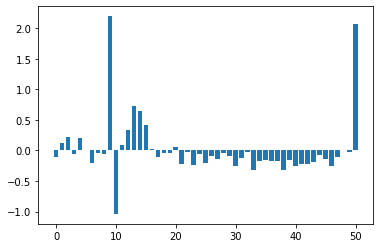

In [672]:
from matplotlib import pyplot
importance = model_h1n1_lr.coef_[0]
feature_names = [key for key in x_train_h1n1 if not key == 'h1n1_vaccine']
for i in range(len(feature_names)):
    print('Feature: '+feature_names[i]+', Score: '+str(importance[i]))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [673]:
from sklearn.metrics import confusion_matrix
p_train_h1n1=model_h1n1_lr.predict(x_train_h1n1)
p_test_h1n1 = model_h1n1_lr.predict(x_test_h1n1)
print(confusion_matrix(p_train_h1n1,np.array(y_train_h1n1)))
print(confusion_matrix(p_test_h1n1,np.array(y_test_h1n1)))

[[11380  1593]
 [  799  2068]]
[[2868  402]
 [ 208  482]]


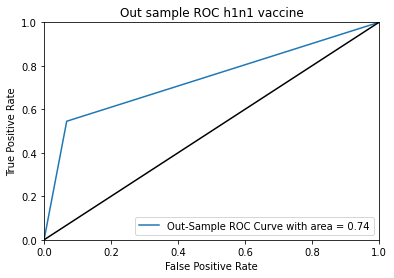

In [674]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_test_h1n1,p_test_h1n1)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Out sample ROC h1n1 vaccine')
pl.legend(loc="lower right")
pl.show()

<h2>Logistic regression for seasonal flu</h2>

In [675]:
from sklearn import linear_model
model_seas_lr = linear_model.LogisticRegression()
model_seas_lr.fit(x_train_seas,y_train_seas)
predictions_seas = model_seas_lr.predict(x_test_seas)
actuals_seas = np.array(y_test_seas)
logistic_acc_seas = model_seas_lr.score(x_test_seas,actuals_seas)
print(logistic_acc_seas)

0.7974747474747474


Feature: h1n1_concern, Score: 0.037500915679334855
Feature: h1n1_knowledge, Score: 0.141500867745783
Feature: behavioral_antiviral_meds, Score: 0.14434726656151445
Feature: behavioral_avoidance, Score: 0.009223415811767699
Feature: behavioral_face_mask, Score: -0.1118818694310764
Feature: behavioral_wash_hands, Score: 0.01886183192058848
Feature: behavioral_large_gatherings, Score: 0.10134142639731827
Feature: behavioral_outside_home, Score: -0.1029713174816492
Feature: behavioral_touch_face, Score: 0.2332531573652239
Feature: doctor_recc_h1n1, Score: -0.8333637115853374
Feature: doctor_recc_seasonal, Score: 1.5626558452238482
Feature: chronic_med_condition, Score: 0.15611298227493797
Feature: child_under_6_months, Score: -0.005715644151929458
Feature: health_worker, Score: 0.6209278248825908
Feature: opinion_h1n1_vacc_effective, Score: -0.08770974832672035
Feature: opinion_h1n1_risk, Score: -0.07425468259385672
Feature: opinion_h1n1_sick_from_vacc, Score: -0.07385239566146494
Feature:

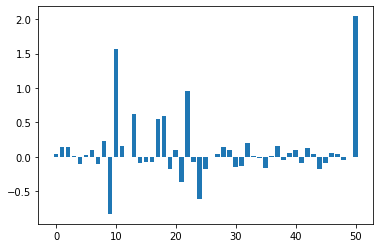

In [676]:
from matplotlib import pyplot
importance = model_seas_lr.coef_[0]
feature_names = [key for key in x_train_seas if not key == 'seasonal_vaccine']
for i in range(len(feature_names)):
    print('Feature: '+feature_names[i]+', Score: '+str(importance[i]))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [677]:
from sklearn.metrics import confusion_matrix
p_train_seas=model_seas_lr.predict(x_train_seas)
p_test_seas = model_seas_lr.predict(x_test_seas)
print(confusion_matrix(p_train_seas,np.array(y_train_seas)))
print(confusion_matrix(p_test_seas,np.array(y_test_seas)))

[[6941 1692]
 [1326 5881]]
[[1724  450]
 [ 352 1434]]


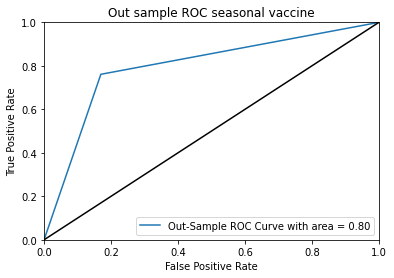

In [678]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_test_seas,p_test_seas)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Out sample ROC seasonal vaccine')
pl.legend(loc="lower right")
pl.show()

<h1>Random forests for h1n1</h1>

In [679]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':(10, 30, 50), #the number of trees
     'max_depth':(4,5,6,8,10,15),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4,8,12,16)
}

model_h1n1_rf = GridSearchCV(RandomForestClassifier(),parameters,cv=3,iid=False)
model_h1n1_rf.fit(x_train_h1n1, np.ravel(y_train_h1n1))
model_h1n1_rf.best_score_, model_h1n1_rf.best_params_

(0.8438762626262627,
 {'max_depth': 15,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 50})

Feature: h1n1_concern, Score: 0.023452510809050885
Feature: h1n1_knowledge, Score: 0.017936838814571077
Feature: behavioral_antiviral_meds, Score: 0.0024980985158246987
Feature: behavioral_avoidance, Score: 0.007747502922443773
Feature: behavioral_face_mask, Score: 0.004377929359032202
Feature: behavioral_wash_hands, Score: 0.0049445147335351325
Feature: behavioral_large_gatherings, Score: 0.009607434365811457
Feature: behavioral_outside_home, Score: 0.009423446975547596
Feature: behavioral_touch_face, Score: 0.00860461942614802
Feature: doctor_recc_h1n1, Score: 0.15865774151451265
Feature: doctor_recc_seasonal, Score: 0.032410043712336314
Feature: chronic_med_condition, Score: 0.011239858640919944
Feature: child_under_6_months, Score: 0.005475006851443483
Feature: health_worker, Score: 0.027725141298225245
Feature: opinion_h1n1_vacc_effective, Score: 0.07873432459679956
Feature: opinion_h1n1_risk, Score: 0.11634911139195872
Feature: opinion_h1n1_sick_from_vacc, Score: 0.02428298671596

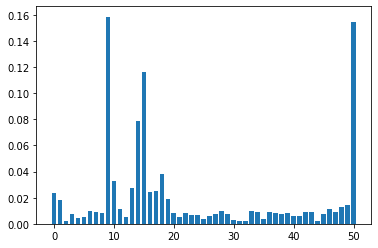

In [680]:
from matplotlib import pyplot
importance = model_h1n1_rf.best_estimator_.feature_importances_
feature_names = [key for key in x_train_h1n1 if not key == 'h1n1_vaccine']
for i in range(len(feature_names)):
    print('Feature: '+feature_names[i]+', Score: '+str(importance[i]))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [681]:
from sklearn.metrics import confusion_matrix
p_train_h1n1=model_h1n1_rf.predict(x_train_h1n1)
p_test_h1n1 = model_h1n1_rf.predict(x_test_h1n1)
print(confusion_matrix(p_train_h1n1,np.array(y_train_h1n1)))
print(confusion_matrix(p_test_h1n1,np.array(y_test_h1n1)))

[[11845  1266]
 [  334  2395]]
[[2889  439]
 [ 187  445]]


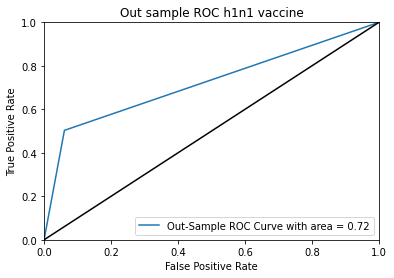

In [682]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_test_h1n1,p_test_h1n1)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Out sample ROC h1n1 vaccine')
pl.legend(loc="lower right")
pl.show()

<h1>Random forests for seasonal flu</h1>

In [683]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':(10, 30, 50), #the number of trees
     'max_depth':(4,5,6,8,10,15),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4,8,12,16)
}

model_seas_rf = GridSearchCV(RandomForestClassifier(),parameters,cv=3,iid=False)
model_seas_rf.fit(x_train_seas, np.ravel(y_train_seas))
model_seas_rf.best_score_, model_seas_rf.best_params_

(0.8039772727272728,
 {'max_depth': 15,
  'min_samples_leaf': 4,
  'min_samples_split': 8,
  'n_estimators': 50})

Feature: h1n1_concern, Score: 0.018897905451109854
Feature: h1n1_knowledge, Score: 0.013789560457687765
Feature: behavioral_antiviral_meds, Score: 0.001602339239867072
Feature: behavioral_avoidance, Score: 0.006909543195821995
Feature: behavioral_face_mask, Score: 0.0017924662272065966
Feature: behavioral_wash_hands, Score: 0.0043687474932126704
Feature: behavioral_large_gatherings, Score: 0.00743534840428969
Feature: behavioral_outside_home, Score: 0.00727328664889203
Feature: behavioral_touch_face, Score: 0.008695110879688876
Feature: doctor_recc_h1n1, Score: 0.019791688330399047
Feature: doctor_recc_seasonal, Score: 0.11230886869797617
Feature: chronic_med_condition, Score: 0.012578511305584333
Feature: child_under_6_months, Score: 0.0026530518162575546
Feature: health_worker, Score: 0.01303774951963997
Feature: opinion_h1n1_vacc_effective, Score: 0.026270281026886614
Feature: opinion_h1n1_risk, Score: 0.025699072747879973
Feature: opinion_h1n1_sick_from_vacc, Score: 0.0174622715464

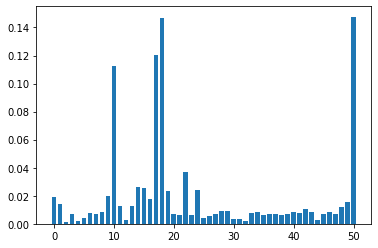

In [684]:
from matplotlib import pyplot
importance = model_seas_rf.best_estimator_.feature_importances_
feature_names = [key for key in x_train_seas if not key == 'seasonal_vaccine']
for i in range(len(feature_names)):
    print('Feature: '+feature_names[i]+', Score: '+str(importance[i]))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [685]:
from sklearn.metrics import confusion_matrix
p_train_seas=model_seas_rf.predict(x_train_seas)
p_test_seas = model_seas_rf.predict(x_test_seas)
print(confusion_matrix(p_train_seas,np.array(y_train_seas)))
print(confusion_matrix(p_test_seas,np.array(y_test_seas)))

[[7379 1042]
 [ 888 6531]]
[[1691  412]
 [ 385 1472]]


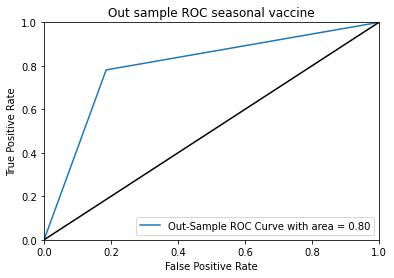

In [686]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_test_seas,p_test_seas)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Out sample ROC seasonal vaccine')
pl.legend(loc="lower right")
pl.show()

<h1>KNN for h1n1</h1>

In [687]:
from sklearn.neighbors import KNeighborsClassifier
model_h1n1_knn = KNeighborsClassifier(n_neighbors=33)
model_h1n1_knn.fit(x_train_h1n1,y_train_h1n1)
predictions_h1n1 = model_h1n1_knn.predict(x_test_h1n1)
actuals_h1n1 = np.array(y_test_h1n1)
knn_acc_h1n1 = model_h1n1_knn.score(x_test_h1n1,actuals_h1n1)
print(knn_acc_h1n1)

0.819949494949495


In [688]:
from sklearn.metrics import confusion_matrix
p_train_h1n1=model_h1n1_knn.predict(x_train_h1n1)
p_test_h1n1 = model_h1n1_knn.predict(x_test_h1n1)
print(confusion_matrix(p_train_h1n1,np.array(y_train_h1n1)))
print(confusion_matrix(p_test_h1n1,np.array(y_test_h1n1)))

[[11644  2258]
 [  535  1403]]
[[2915  552]
 [ 161  332]]


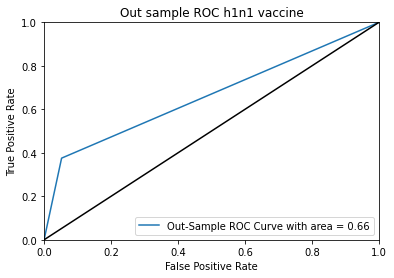

In [689]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_test_h1n1,p_test_h1n1)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Out sample ROC h1n1 vaccine')
pl.legend(loc="lower right")
pl.show()

<h1>KNN for seasonal flu</h1>

In [690]:
from sklearn.neighbors import KNeighborsClassifier
model_seas_knn = KNeighborsClassifier(n_neighbors=33)
model_seas_knn.fit(x_train_seas,y_train_seas)
predictions_seas = model_seas_knn.predict(x_test_seas)
actuals_seas = np.array(y_test_seas)
knn_acc_seas = model_h1n1_knn.score(x_test_seas,actuals_seas)
print(knn_acc_seas)

0.6073232323232324


In [691]:
from sklearn.metrics import confusion_matrix
p_train_seas=model_seas_knn.predict(x_train_seas)
p_test_seas = model_seas_knn.predict(x_test_seas)
print(confusion_matrix(p_train_seas,np.array(y_train_seas)))
print(confusion_matrix(p_test_seas,np.array(y_test_seas)))

[[6684 1874]
 [1583 5699]]
[[1621  488]
 [ 455 1396]]


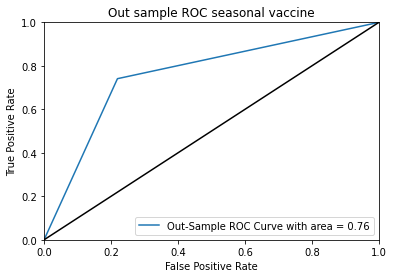

In [692]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_test_seas,p_test_seas)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Out sample ROC seasonal vaccine')
pl.legend(loc="lower right")
pl.show()